In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 훈련 데이터 불러오기
train_data = pd.read_csv("/kaggle/input/pubg-finish-placement-prediction/train_V2.csv")
train_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [7]:
train_data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [8]:
train_data.shape

(4446966, 29)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [10]:
# 컬럼별 결측치 개수 확인
train_data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [11]:
# 전체 훈련 데이터의 5%만 랜덤 샘플링
sample_train_data = train_data.sample(frac=0.05, random_state=42)

In [12]:
sample_train_data.shape

(222348, 29)

In [13]:
# 한 경기에서의 최대 킬 횟수가 참여자 수를 넘지 않는지 확인
max_kills_per_match = sample_train_data.groupby('matchId')['kills'].max()
num_players_per_match = sample_train_data.groupby('matchId')['Id'].count()

# 최대 킬 횟수가 참여자 수를 넘는 행 추출
invalid_matches = max_kills_per_match[max_kills_per_match > num_players_per_match].index

# 해당하는 행 삭제
sample_train_data = sample_train_data[~sample_train_data['matchId'].isin(invalid_matches)]

# 전처리 후 데이터 확인
print("전처리 후 데이터 개수:", len(sample_train_data))

전처리 후 데이터 개수: 201896


In [14]:
# 총 이동거리가 0이고 집은 무기 수가 0이고 죽인 적의 수가 0이며 winPlacePerc가 1인 플레이어 제거
sample_train_data["total_zero"] = sample_train_data["rideDistance"] + sample_train_data["swimDistance"] + sample_train_data["walkDistance"] + sample_train_data["weaponsAcquired"]

a = sample_train_data.loc[(sample_train_data["total_zero"] == 0) & (sample_train_data["winPlacePerc"]==1)].index

sample_train_data.drop(index = a, inplace=True) # 조건에 맞는 행 제
sample_train_data.drop(columns=['total_zero'], inplace=True) # 새로 생성한 컬럼 다시 삭제
sample_train_data.shape

(201894, 29)

In [15]:
columns_to_drop = ['damageDealt', 'killPoints', 'rankPoints', 
                   'winPoints', 'numGroups', 'maxPlace', 'roadKills', 
                   'teamKills', 'vehicleDestroys', 'groupId', 'matchId']

sample_train_data.drop(columns=columns_to_drop, inplace=True)

In [16]:
# 필요없는 컬럼, 행 삭제 후 데이터 크기 확인
sample_train_data.shape

(201894, 18)

In [17]:
# winPlacePerc의 평균 계산
mean_winPlacePerc = sample_train_data['winPlacePerc'].mean()

# null 값을 평균으로 채우기
sample_train_data['winPlacePerc'].fillna(mean_winPlacePerc, inplace=True)

/tmp/ipykernel_34/2063555261.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_train_data['winPlacePerc'].fillna(mean_winPlacePerc, inplace=True)


In [18]:
sample_train_data.loc[sample_train_data["matchType"].str.contains("crash"), "matchType"] = "crash"
sample_train_data.loc[sample_train_data["matchType"].str.contains("flare"), "matchType"] = "flare"
sample_train_data.loc[sample_train_data["matchType"].str.contains("duo"), "matchType"] = "duo"
sample_train_data.loc[sample_train_data["matchType"].str.contains("solo"), "matchType"] = "solo"
sample_train_data.loc[sample_train_data["matchType"].str.contains("squad"), "matchType"] = "squad"

In [19]:
from sklearn.preprocessing import OneHotEncoder

# 원핫 인코더 객체 생성
enc = OneHotEncoder()
# matchType 컬럼 원핫인코딩
train_matchType_encoded = enc.fit_transform(sample_train_data[["matchType"]])

# 인코딩 결과 배열로 반환 (각 열 이름은 matchType으로 지정)
train_encoded_df = pd.DataFrame(train_matchType_encoded.toarray(), columns=enc.get_feature_names_out(["matchType"]))

# 병합을 위해 각각 인덱스 재설정
sample_train_data.reset_index(drop=True, inplace=True)
train_encoded_df.reset_index(drop=True, inplace=True)

# 기존 훈련데이터셋에서 matchType 제거 -> 인코딩된 matchType 데이터프레임이랑 병합
train_final_df = pd.concat([sample_train_data.drop("matchType", axis=1), train_encoded_df], axis=1)

In [20]:
# 먼저 플레이어 Id 열을 따로 빼서 설정 후
train_final_id = train_final_df["Id"]

# 모델 적용을 위해 object 형태의 Id 제거
train_final_df.drop(["Id"], inplace = True, axis = 1)

In [21]:
# 종속변수인 winPlacePerc를 제외한 컬럼을 X로 설정
X = train_final_df.drop('winPlacePerc', axis=1)

# 모델의 label인 Y를 winPlacePerc로 설정
Y = train_final_df['winPlacePerc']

In [22]:
import sklearn.model_selection

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(161515, 20)
(40379, 20)
(161515,)
(40379,)


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

# 스케일 후 데이터 확인
X_train_scaled[:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.96969697, 0.        , 0.        , 0.        , 0.83080808,
        0.        , 0.        , 0.        , 0.01303111, 0.05714286,
        0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.81818182, 0.        , 0.        , 0.        , 0.73030303,
        0.        , 0.        , 0.        , 0.00496444, 0.2       ,
        0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.25      , 0.52941176, 0.06666667, 0.        , 0.14583333,
        0.05050505, 0.30769231, 0.125     , 0.19205986, 0.83838384,
        0.        , 0.20984127, 0.02003922, 0.33315556, 0.25714286,
        0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.86868687, 0.        , 0.        , 0.        , 0.61717172,
        0.        , 0.        , 0.        , 0

In [24]:
# 시리즈 -> 데이터프레임으로 변환
import pandas as pd

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [25]:
scaler.fit(X_test)

X_test_scaled = scaler.transform(X_test)

X_test_scaled[:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.7979798 , 0.        , 0.        , 0.        , 0.77467199,
        0.        , 0.        , 0.        , 0.01820336, 0.21052632,
        0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.07142857, 0.        , 0.        , 0.07017544,
        0.4040404 , 0.        , 0.        , 0.        , 0.87963491,
        0.        , 0.20484943, 0.        , 0.14768016, 0.15789474,
        0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.34343434, 0.11111111, 0.2       , 0.00164853, 0.85510553,
        0.        , 0.        , 0.        , 0.04351431, 0.05263158,
        0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.09090909, 0.        , 0.01754386,
        0.73737374, 0.        , 0.        , 0.        , 0.54192812,
        0.        , 0.        , 0.        , 0

In [26]:
# 시리즈 -> 데이터프레임으로 변환
import pandas as pd

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [27]:
X_test_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40379 entries, 0 to 40378
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   assists          40379 non-null  float64
 1   boosts           40379 non-null  float64
 2   DBNOs            40379 non-null  float64
 3   headshotKills    40379 non-null  float64
 4   heals            40379 non-null  float64
 5   killPlace        40379 non-null  float64
 6   kills            40379 non-null  float64
 7   killStreaks      40379 non-null  float64
 8   longestKill      40379 non-null  float64
 9   matchDuration    40379 non-null  float64
 10  revives          40379 non-null  float64
 11  rideDistance     40379 non-null  float64
 12  swimDistance     40379 non-null  float64
 13  walkDistance     40379 non-null  float64
 14  weaponsAcquired  40379 non-null  float64
 15  matchType_crash  40379 non-null  float64
 16  matchType_duo    40379 non-null  float64
 17  matchType_fl

In [28]:
import lightgbm as lgb

# LightGBM 모델 초기화
lgb_model = lgb.LGBMRegressor()

# LightGBM 모델 학습
lgb_model.fit(X_train_scaled, Y_train)

# LightGBM 모델을 활용한 변수 중요도 계산
feature_importance = lgb_model.feature_importances_

# 변수 중요도를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# 변수 중요도를 기준으로 내림차순 정렬
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# 상위 10개 변수 선택
top_10_features = feature_importance_df_sorted.head(10)

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1522
[LightGBM] [Info] Number of data points in the train set: 161515, number of used features: 20
[LightGBM] [Info] Start training from score 0.463117


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [31]:
import lightgbm as lgb
# 실행 시간 측정 시작
start_time = time.time()

# LightGBM 모델 초기화
lgb_model = lgb.LGBMRegressor()

# 하이퍼파라미터 설정
lgb_param = {
    'num_leaves': 31,
    'objective': 'regression',
    'metric': 'rmse'
}

# LightGBM 모델 학습
lgb_model.fit(X_train_scaled, Y_train)

# LightGBM 모델을 활용한 테스트 데이터 예측
Y_pred_lgb = lgb_model.predict(X_test_scaled)

# 성능 지표 계산을 위한 라이브러리 import
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# MAE (Mean Absolute Error) 계산
mae_lgb = mean_absolute_error(Y_test, Y_pred_lgb)

# R^2 계산
r2_lgb = r2_score(Y_test, Y_pred_lgb)

# RMSE (Root Mean Squared Error) 계산
rmse_lgb = mean_squared_error(Y_test, Y_pred_lgb, squared=False)

# 실행 시간 측정 종료
end_time = time.time()

# 총 실행 시간 계산
execution_time = end_time - start_time
print("LightGBM 모델 실행 시간:", execution_time)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1522
[LightGBM] [Info] Number of data points in the train set: 161515, number of used features: 20
[LightGBM] [Info] Start training from score 0.463117
LightGBM 모델 실행 시간: 3.4009950160980225


In [32]:
# 성능 지표 출력
print("LightGBM 모델 성능 지표:")
print(f"MAE: {mae_lgb}")
print(f"R^2: {r2_lgb:.4f}")
print(f"RMSE: {rmse_lgb}")

LightGBM 모델 성능 지표:
MAE: 0.06788486551791548
R^2: 0.9027
RMSE: 0.09468990068643345


In [33]:
# 최적의 하이퍼파라미터 기반 모델 생성
best_hyperparam_model = lgb.LGBMRegressor(num_leaves=31, objective='regression', metric='rmse')

# 최적의 하이퍼파라미터로 모델 학습
best_hyperparam_model.fit(X_train_scaled, Y_train)

# 모델 적용해서 테스트 데이터 예측
Y_pred = best_hyperparam_model.predict(X_test_scaled)

# LightGBM 모델 학습
lgb_model.fit(X_train_scaled, Y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1522
[LightGBM] [Info] Number of data points in the train set: 161515, number of used features: 20
[LightGBM] [Info] Start training from score 0.463117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1522
[LightGBM] [Info] Number of data points in the train set: 161515, number of used features: 20
[LightGBM] [Info] Start training from score 0.463117


LGBMRegressor()

In [34]:
# LightGBM 모델을 활용한 테스트 데이터 예측
Y_pred_lgb = lgb_model.predict(X_test_scaled)

Text(0.5, 1.0, 'winPlacePerc vs Predicted winPlacePerc')

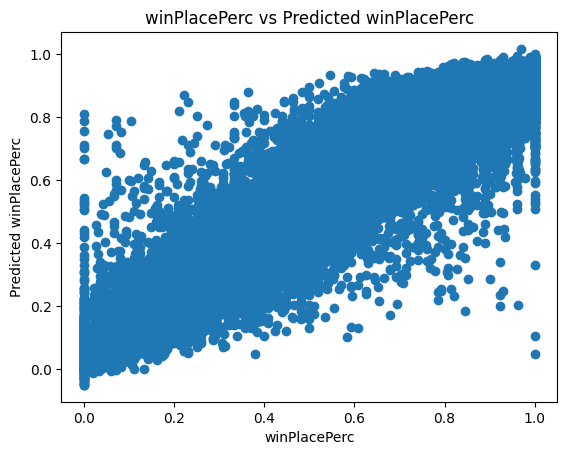

In [35]:
# 시각화
plt.scatter(Y_test, Y_pred)
plt.xlabel("winPlacePerc")
plt.ylabel("Predicted winPlacePerc")
plt.title("winPlacePerc vs Predicted winPlacePerc")

In [36]:
# 성능 지표 계산을 위한 라이브러리 import
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# MAE (Mean Absolute Error) 계산
mae_lgb = mean_absolute_error(Y_test, Y_pred_lgb)

# R^2 계산
r2_lgb = r2_score(Y_test, Y_pred_lgb)

# RMSE (Root Mean Squared Error) 계산
rmse_lgb = mean_squared_error(Y_test, Y_pred_lgb, squared=False)

# 결과 출력
print("LightGBM 모델 성능 지표:")
print(f"MAE: {mae_lgb}")
print(f"R^2: {r2_lgb:.4f}")
print(f"RMSE: {rmse_lgb}")

LightGBM 모델 성능 지표:
MAE: 0.06788486551791548
R^2: 0.9027
RMSE: 0.09468990068643345


In [37]:
# 예측 결과를 데이터프레임으로 변환
predicted_df = pd.DataFrame(Y_pred_lgb, columns=['winPlacePerc'])

# 결과 출력
print(predicted_df)

       winPlacePerc
0          0.173137
1          0.806760
2          0.312439
3          0.250512
4          0.793993
...             ...
40374      0.578261
40375      0.327946
40376      0.914978
40377      0.385456
40378      0.347241

[40379 rows x 1 columns]


In [38]:
# 예측 결과와 플레이어 ID를 합치기 위해 데이터프레임으로 변환
player_id_df = pd.DataFrame({'Id': X_test.index, 'winPlacePerc': Y_pred_lgb})

# 결과 출력
print(player_id_df)

# CSV 파일로 저장
player_id_df.to_csv('submission.csv', index=False)

           Id  winPlacePerc
0      185487      0.173137
1      181177      0.806760
2      136751      0.312439
3      165287      0.250512
4      111648      0.793993
...       ...           ...
40374   27078      0.578261
40375     127      0.327946
40376   59476      0.914978
40377   17234      0.385456
40378   31484      0.347241

[40379 rows x 2 columns]


In [39]:
!ls -tl

total 1020
-rw-r--r-- 1 root root 1040495 May 14 12:44 submission.csv


In [40]:
# 테스트 데이터 불러오기
test_data = pd.read_csv("/kaggle/input/pubg-finish-placement-prediction/test_V2.csv")

# 제출용 샘플 데이터 불러오기
sub = pd.read_csv("/kaggle/input/pubg-finish-placement-prediction/sample_submission_V2.csv")

In [41]:
test_data.shape

(1934174, 28)

In [42]:
test_data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

In [43]:
# 한 경기에서의 최대 킬 횟수가 참여자 수를 넘지 않는지 확인
max_kills_per_match = test_data.groupby('matchId')['kills'].max()
num_players_per_match = test_data.groupby('matchId')['Id'].count()

# 최대 킬 횟수가 참여자 수를 넘는 행 추출
invalid_matches = max_kills_per_match[max_kills_per_match > num_players_per_match].index

# 해당하는 행 삭제
#test_data = test_data[~test_data['matchId'].isin(invalid_matches)]

# 해당하는 행 0으로 치환
test_data.loc[test_data['matchId'].isin(invalid_matches), 'winPlacePerc'] = 0

# 전처리 후 데이터 확인
print("전처리 후 데이터 개수:", len(test_data))

전처리 후 데이터 개수: 1934174


In [44]:
# 필요 없는 컬럼 제거
test_data.drop(columns=columns_to_drop, inplace=True)

# 필요없는 컬럼, 행 삭제 후 데이터 크기 확인
test_data.shape

(1934174, 18)

In [45]:
# matchType 범주화
test_data.loc[test_data["matchType"].str.contains("crash"), "matchType"] = "crash"
test_data.loc[test_data["matchType"].str.contains("flare"), "matchType"] = "flare"
test_data.loc[test_data["matchType"].str.contains("duo"), "matchType"] = "duo"
test_data.loc[test_data["matchType"].str.contains("solo"), "matchType"] = "solo"
test_data.loc[test_data["matchType"].str.contains("squad"), "matchType"] = "squad"

In [46]:
## matchType(범주형 변수) 원핫 인코딩
test_matchType_encoded = enc.fit_transform(test_data[["matchType"]])

# 인코딩 결과 배열로 반환 (각 열 이름은 matchType으로 지정)
test_encoded_df = pd.DataFrame(test_matchType_encoded.toarray(), columns=enc.get_feature_names_out(["matchType"]))

# 병합을 위해 각각 인덱스 재설정
test_data.reset_index(drop=True, inplace=True)
test_encoded_df.reset_index(drop=True, inplace=True)

# 기존 훈련데이터셋에서 matchType 제거 -> 인코딩된 matchType 데이터프레임이랑 병합
test_final_df = pd.concat([test_data.drop("matchType", axis=1), test_encoded_df], axis=1)

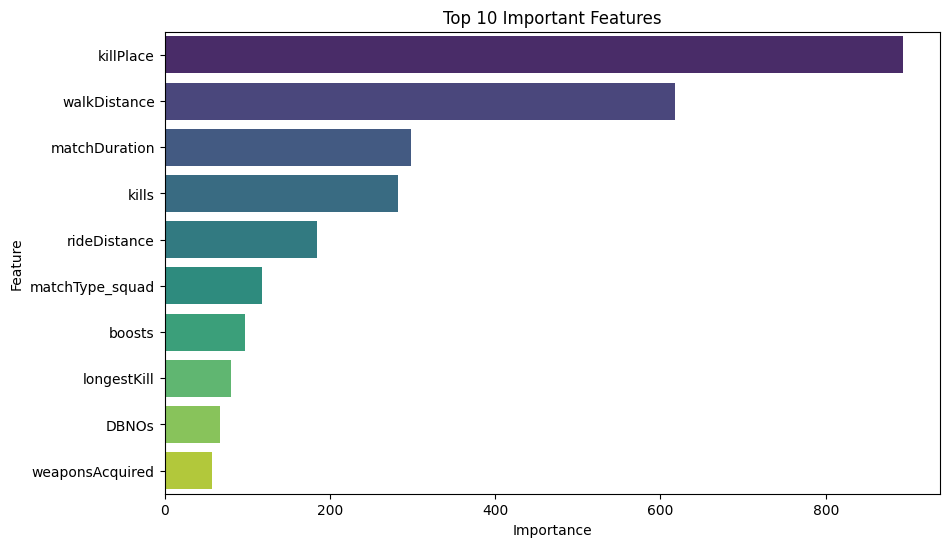

In [47]:
# LightGBM 모델을 활용한 변수 중요도 계산
feature_importance = lgb_model.feature_importances_

# 변수 중요도를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# 변수 중요도를 기준으로 내림차순 정렬
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# 상위 10개 변수 선택
top_10_features = feature_importance_df_sorted.head(10)

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

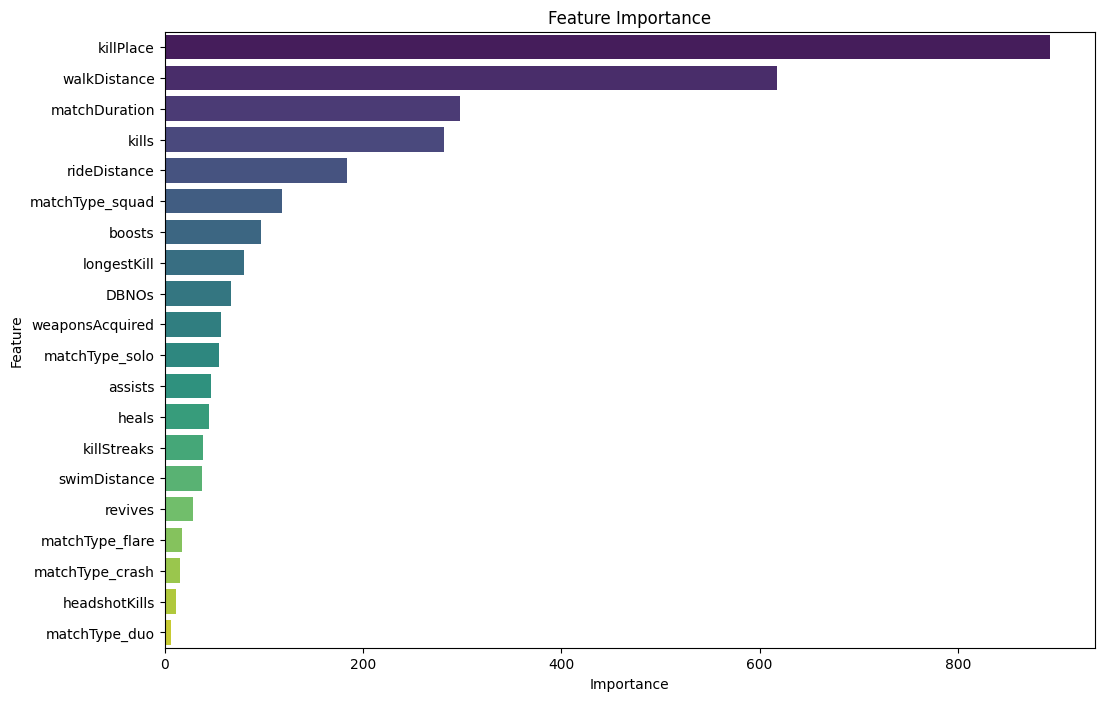

In [48]:
# 변수 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# 먼저 플레이어 Id 열을 따로 빼서 설정 후
test_final_id = test_final_df["Id"]

# 모델 적용을 위해 object 형태의 Id 제거
test_final_df.drop(["Id"], axis=1, inplace=True)

In [ ]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(test_final_df)
X_final_scaled = scaler.transform(test_final_df)

# 스케일 후 데이터 확인
X_final_scaled[:5]

In [69]:
# 'Id' 열을 문자열로 변환
submission_df['Id'] = submission_df['Id'].astype(str)

# CSV 파일로 저장
submission_df.to_csv('submission.csv', index=False)

In [74]:
# 플레이어 ID와 예측 결과를 합치기
submission_df = pd.concat([test_final_id_df.astype(str), Y_final_pred_df], axis=1)

In [75]:
# test_final_id를 DataFrame으로 변환
test_final_id_df = pd.DataFrame(test_final_id, columns=['Id'])

# Y_final_pred를 Series에서 DataFrame으로 변환
Y_final_pred_df = pd.DataFrame({'winPlacePerc': Y_final_pred})

# 플레이어 ID와 예측 결과를 합치기
submission_df = pd.concat([test_final_id_df, Y_final_pred_df], axis=1)

# 결과 출력
print(submission_df)

# CSV 파일로 저장
submission_df.to_csv('submission.csv', index=False)

                     Id  winPlacePerc
0        9329eb41e215eb      0.173137
1        639bd0dcd7bda8      0.806760
2        63d5c8ef8dfe91      0.312439
3        cf5b81422591d1      0.250512
4        ee6a295187ba21      0.793993
...                 ...           ...
1934169  a316c3a13887d5           NaN
1934170  5312146b27d875           NaN
1934171  fc8818b5b32ad3           NaN
1934172  a0f91e35f8458f           NaN
1934173  3696fc9f3a42b2           NaN

[1934174 rows x 2 columns]


In [76]:
# LightGBM 모델을 활용한 테스트 데이터 예측
Y_final_pred = lgb_model.predict(X_test_scaled)

# 모델이 예측한 승리 순위 백분위수를 컬럼명 winPlacePerc로 지정해서 데이터프레임으로 변환
Y_final_pred_df = pd.DataFrame(Y_final_pred, columns=['winPlacePerc'])


In [77]:
## 현재 디렉토리 내 파일 확인
!ls -tl

total 30944
-rw-r--r-- 1 root root 31686436 May 13 14:56 submission.csv


In [78]:
print(submission_df)

                     Id  winPlacePerc
0        9329eb41e215eb      0.173137
1        639bd0dcd7bda8      0.806760
2        63d5c8ef8dfe91      0.312439
3        cf5b81422591d1      0.250512
4        ee6a295187ba21      0.793993
...                 ...           ...
1934169  a316c3a13887d5           NaN
1934170  5312146b27d875           NaN
1934171  fc8818b5b32ad3           NaN
1934172  a0f91e35f8458f           NaN
1934173  3696fc9f3a42b2           NaN

[1934174 rows x 2 columns]


In [79]:
print(len(Y_final_pred))

40379
